In [1]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def showImage(image, cmap = None, window_name = None):
    plt.imshow(image, cmap = cmap)
    
    if window_name is not None:
        cv2.imshow(window_name, image)
        cv2.waitKey(0)
        cv2.destroyWindow(window_name)

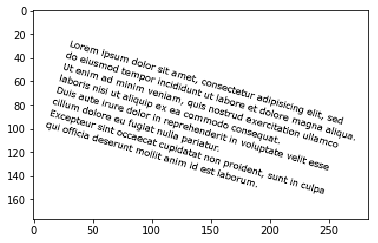

In [3]:
image = cv2.imread("skew correction/1.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
showImage(gray, cmap='gray')

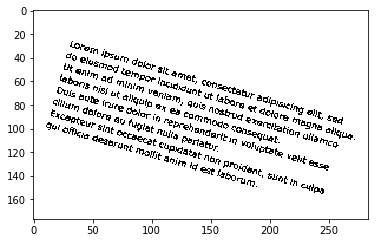

In [4]:
_, thres = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
showImage(thres, cmap='gray')

(177, 284)


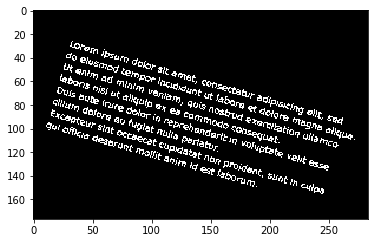

In [5]:
invert = cv2.bitwise_not(thres)
showImage(invert, cmap='gray')
print invert.shape

In [6]:
coords = np.column_stack(np.where(invert > 0))
angle = cv2.minAreaRect(coords)[-1]


if angle < -45:
    angle = -(90 + angle)
else:
    angle = -angle

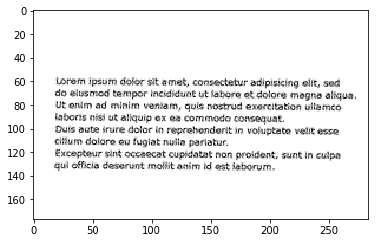

In [7]:
(h, w) = image.shape[:2]
center = (w // 2, h // 2)

M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode = cv2.BORDER_REPLICATE)

showImage(rotated)